In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("Uncleaned_DS_jobs.csv",index_col="index")
df.sample(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
index,,,,,,,,,,,,,,
644,Data Scientist,$92K-$155K (Glassdoor est.),Job Description\n\nCACI is seeking fully clear...,3.5,CACI International\n3.5,"Chantilly, VA","Arlington, VA",10000+ employees,1962,Company - Public,Aerospace & Defense,Aerospace & Defense,$2 to $5 billion (USD),"CSC, ManTech, SAIC"
584,Senior Machine Learning Engineer,$138K-$158K (Glassdoor est.),We are looking for an experienced engineer wit...,5.0,LifeOmic\n5.0,"Raleigh, NC","Indianapolis, IN",51 to 200 employees,2016,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1
194,Senior Data Scientist - R&D Oncology,$56K-$97K (Glassdoor est.),"At AstraZeneca,we work together to deliver inn...",4.0,AstraZeneca\n4.0,"New York, NY","Cambridge, United Kingdom",10000+ employees,1913,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Roche, GlaxoSmithKline, Novartis"
571,Data Scientist / Applied Mathematician,$138K-$158K (Glassdoor est.),"Fullpower® designs, develops and operates a co...",4.5,"Fullpower Technologies, Inc.\n4.5","Santa Cruz, CA","Santa Cruz, CA",51 to 200 employees,2003,Company - Private,Computer Hardware & Software,Information Technology,$10 to $25 million (USD),-1
184,Senior Data Analyst,$56K-$97K (Glassdoor est.),About us\n\n\nLife360 brings families closer w...,3.9,Life360\n3.9,"San Francisco, CA","San Francisco, CA",51 to 200 employees,2008,Company - Public,Internet,Information Technology,Unknown / Non-Applicable,-1
479,In-Line Inspection Data Analyst,$31K-$56K (Glassdoor est.),In-Line Inspection Data Analyst\n\nQuest Integ...,2.9,Quest Integrity\n2.9,"Tulsa, OK","Kent, WA",201 to 500 employees,1996,Company - Public,Oil & Gas Services,"Oil, Gas, Energy & Utilities",$50 to $100 million (USD),-1
239,Data Scientist,$71K-$123K (Glassdoor est.),Job Description\nWe are looking for Data Scien...,3.9,Predictive Research Inc\n3.9,"Plano, TX","Bangalore, India",1 to 50 employees,-1,Company - Private,Consulting,Business Services,Unknown / Non-Applicable,-1
80,"Real World Science, Data Scientist",$79K-$131K (Glassdoor est.),"Title: Real World Science, Data Scientist\nLoc...",4.0,AstraZeneca\n4.0,"Gaithersburg, MD","Cambridge, United Kingdom",10000+ employees,1913,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Roche, GlaxoSmithKline, Novartis"
518,Data Science Software Engineer,$212K-$331K (Glassdoor est.),We love programming and the excitement that co...,4.8,Klaviyo\n4.8,"Boston, MA","Boston, MA",201 to 500 employees,2012,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1


In [3]:
## fix the columns
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          672 non-null    object 
 1   salary_estimate    672 non-null    object 
 2   job_description    672 non-null    object 
 3   rating             672 non-null    float64
 4   company_name       672 non-null    object 
 5   location           672 non-null    object 
 6   headquarters       672 non-null    object 
 7   size               672 non-null    object 
 8   founded            672 non-null    int64  
 9   type_of_ownership  672 non-null    object 
 10  industry           672 non-null    object 
 11  sector             672 non-null    object 
 12  revenue            672 non-null    object 
 13  competitors        672 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 78.8+ KB


In [5]:
## check null
df.isnull().sum()

job_title            0
salary_estimate      0
job_description      0
rating               0
company_name         0
location             0
headquarters         0
size                 0
founded              0
type_of_ownership    0
industry             0
sector               0
revenue              0
competitors          0
dtype: int64

In [6]:
## check uniques 
df.nunique()

job_title            172
salary_estimate       30
job_description      489
rating                32
company_name         432
location             207
headquarters         229
size                   9
founded              103
type_of_ownership     13
industry              58
sector                23
revenue               14
competitors          108
dtype: int64

# Check and clean data column by column 
## Job Title

### Findings

In [7]:
df["job_title"].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

In [8]:
# total values
df["job_title"].count()

672

In [9]:
# check the distribution of job titles
df["job_title"].value_counts().head(7)

Data Scientist               337
Data Engineer                 26
Senior Data Scientist         19
Machine Learning Engineer     16
Data Analyst                  12
Senior Data Analyst            6
Senior Data Engineer           5
Name: job_title, dtype: int64

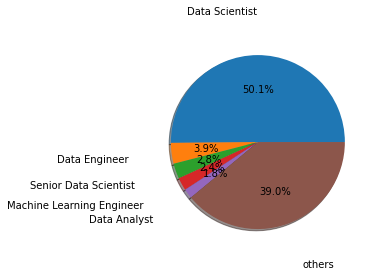

<Figure size 72x144 with 0 Axes>

Index(['Senior Data Analyst', 'Senior Data Engineer',
       'Data Science Software Engineer',
       'ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING - SAN ANTONIO OR',
       'Data Scientist - TS/SCI FSP or CI Required',
       'Principal Data Scientist', 'Sr. ML/Data Scientist - AI/NLP/Chatbot',
       'AI Ops Data Scientist', 'Data Modeler (Analytical Systems)',
       'Lead Data Scientist',
       ...
       'Computational Scientist, Machine Learning', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Global Data Analyst',
       'Data Engineer (Remote)', 'Data Science Instructor',
       'Business Data Analyst', 'Purification Scientist',
       'Data Engineer, Enterprise Analytics',
       'AI/ML - Machine Learning Scientist, Siri Understanding'],
      dtype='object', length=167)

In [10]:
# visualize it with pie plot
def pie_jobs(df:pd.Series,top):
    top=df.value_counts().head(top)
    others=pd.Series([df.count()-top.sum()])
    others.rename(index={0:"others"},inplace=True)
    titles=pd.concat([top,others])

    plt.pie(titles,labels=titles.index,labeldistance=1.5,shadow=True,autopct='%1.1f%%')
    plt.figure(figsize=(1,2))
    plt.show()
    
    return df.value_counts().tail(df.nunique()-5)
# regard top 7 as majority
others=pie_jobs(df["job_title"],5)
others.index

- ### Problems
    * too many uniqueness
    * two or more roles per person("/" )presents
    * all roles some how duplicated in many ways 
    * There are only 4 super categories 
        1. data scientist
        2. data analyst
        3. data engineer
        4. Machine learning or AI modeling engineer
    * there are also seniority in the tiles 
    
- ### Solutions
    * create main and sub roles column 
    * create discrete integer column called senority, raise the number according to experience required(0,1,2,3: "no experience","junior level","senior level")
    
    

In [11]:
def createMainRole(df:pd.DataFrame):
    new_role=[]
    for row in df["job_title"].values:
        if ("data scientist"in row.lower() and ("ai" in row.lower() or "machine learning" in row.lower())):
            new_role.append("AI/ machine learning professionle")
        elif ("data scientist" in row.lower()):
            new_role.append("data scientist")
        elif ("analyst" in row.lower()):
            new_role.append("data analyst/analyst")
        elif ("ai" in row.lower() or "machine learning" in row.lower()):
            new_role.append("AI/ machine learning professionle")
        elif ("data engineer" in row.lower()):
            new_role.append("data engineer")
        else:
            new_role.append("others/scientist/software engineer(data concerning role)")
        df["main_role"]=pd.Series(new_role)


In [12]:
def createSenority(df:pd.DataFrame):
    senior=[]
    for row in df["job_title"].values:
        if ("senior"in row.lower() or "sr" in row.lower() or "experienced" in row.lower()):
            senior.append("Sr")
        elif ("junior" in row.lower() or "jr" in row.lower() or "staff" in row.lower()):
            senior.append("jr")
        else:
            senior.append("neutral")
        df["seniority"]=pd.Series(senior)

In [13]:
def createSubRole(df:pd.DataFrame):
    roles=[]
    for (row,find) in zip(df["job_title"].values,df["main_role"].values):
        if (find=="data scientist"):
            roles.append(row.replace("Data Scientist",""))
        elif (find=="AI/ machine learning professionle"):
            roles.append(row.replace("AI","").replace("Machine Learning",""))
        elif(find=="data analyst/analyst"):
            roles.append(row.replace("Data Analyst","").replace("Analyst",""))
        else:
            roles.append(row.replace("Data Engineer",""))
                        
    df["sub_role"]=pd.Series(roles)

In [14]:
createMainRole(df)

In [15]:
createSenority(df)

In [16]:
createSubRole(df)

In [17]:
df.sample(7)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,main_role,seniority,sub_role
index,,,,,,,,,,,,,,,,,
659,Data Scientist,$105K-$167K (Glassdoor est.),Position is in support of the U.S. Army CCDC C...,3.2,Perspecta\n3.2,"Adelphi, MD","Chantilly, VA",10000+ employees,2018,Company - Public,Aerospace & Defense,Aerospace & Defense,Unknown / Non-Applicable,-1,data scientist,neutral,
655,Data Scientist,$105K-$167K (Glassdoor est.),"Role: Data ScientistÂ\n\nLocation: Washington,...",4.0,Comtech Global Inc\n4.0,"Washington, DC","Columbus, OH",51 to 200 employees,-1,Company - Private,"Health, Beauty, & Fitness",Consumer Services,$5 to $10 million (USD),-1,data scientist,neutral,
36,Business Intelligence Analyst,$75K-$131K (Glassdoor est.),The Business Intelligence Analyst is responsib...,2.7,Sandhills Global\n2.7,"Lincoln, NE","Lincoln, NE",1001 to 5000 employees,1978,Company - Private,Enterprise Software & Network Solutions,Information Technology,$50 to $100 million (USD),-1,data analyst/analyst,neutral,Business Intelligence
633,Data Scientist,$92K-$155K (Glassdoor est.),Position Role/Tile: Data Scientist\nLocation: ...,3.0,"Central Business Solutions, Inc\n3.0","Seattle, WA","Fremont, CA",51 to 200 employees,-1,Company - Private,Consulting,Business Services,$5 to $10 million (USD),-1,data scientist,neutral,
273,Data Scientist,$91K-$150K (Glassdoor est.),Job Description\nRequired Security Clearance: ...,3.2,"Metronome, LLC\n3.2","Vienna, VA","Fairfax, VA",51 to 200 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,data scientist,neutral,
113,Data Engineer,$99K-$132K (Glassdoor est.),"At Phantom AI, experience the fast paced envir...",5.0,Phantom AI\n5.0,"Burlingame, CA","Burlingame, CA",1 to 50 employees,2016,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,data engineer,neutral,
333,Data Scientist,$79K-$147K (Glassdoor est.),"Job Description\nData Scientist, Clearance Req...",5.0,SSATI\n5.0,"McLean, VA","Annapolis Junction, MD",1 to 50 employees,2003,Company - Private,Computer Hardware & Software,Information Technology,$10 to $25 million (USD),-1,data scientist,neutral,


In [18]:
df["main_role"].value_counts()

data scientist                                              431
others/scientist/software engineer(data concerning role)     78
AI/ machine learning professionle                            61
data analyst/analyst                                         55
data engineer                                                47
Name: main_role, dtype: int64

In [19]:
df["seniority"].value_counts()

neutral    585
Sr          79
jr           8
Name: seniority, dtype: int64

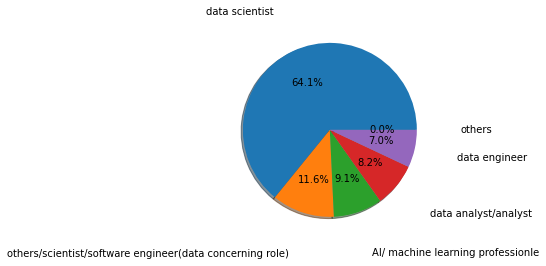

<Figure size 72x144 with 0 Axes>

Series([], Name: main_role, dtype: int64)

In [20]:
pie_jobs(df["main_role"],5)

In [21]:
df.loc[df["main_role"]=="AI/ machine learning professionle"][["job_title","main_role","sub_role"]].sample(10)

,job_title,main_role,sub_role
index,,,
219,"Senior Machine Learning Scientist - Bay Area, CA",AI/ machine learning professionle,"Senior Scientist - Bay Area, CA"
202,Machine Learning Engineer,AI/ machine learning professionle,Engineer
556,"Senior Machine Learning Scientist - Bay Area, CA",AI/ machine learning professionle,"Senior Scientist - Bay Area, CA"
653,Sr. ML/Data Scientist - AI/NLP/Chatbot,AI/ machine learning professionle,Sr. ML/Data Scientist - /NLP/Chatbot
69,Data Scientist - Machine Learning,AI/ machine learning professionle,Data Scientist -
405,Senior Machine Learning Engineer,AI/ machine learning professionle,Senior Engineer
261,Principal Data Scientist - Machine Learning,AI/ machine learning professionle,Principal Data Scientist -
436,Data Scientist - Machine Learning,AI/ machine learning professionle,Data Scientist -
125,Sr. ML/Data Scientist - AI/NLP/Chatbot,AI/ machine learning professionle,Sr. ML/Data Scientist - /NLP/Chatbot


## Salary Estimate

In [22]:
## checking uniqueness
df["salary_estimate"].unique()

array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

- ### Problems
    * have unnecessary content(eg, Glassdoor est.)
    * have signs that can be turn into number (K=1000)

    
- ### Solutions
    * drop, strip or replace such contents
    * create a salary range column for the purpose of more data analysis
    
    

In [23]:
# replacing Glassdoor est. 
df["salary_estimate"]=df["salary_estimate"].replace("Glassdoor est.","",regex=True).str.strip("(").str.strip(")")

In [24]:
# replacing Employer est. 
df["salary_estimate"]=df["salary_estimate"].replace("Employer est.","",regex=True).str.strip("(")

In [25]:
# Define a function to extract and create intervals
def extract_salary_range(salary_estimate):
    parts = salary_estimate.split('-')
    lower_bound = int(parts[0].strip('$').strip('K'))*1000
    upper_bound = int(parts[1].strip('$').replace('K',''))*1000
    
    avg=np.average(np.arange(lower_bound,upper_bound))
    return [f"{lower_bound}-{upper_bound}",lower_bound,upper_bound,avg]

In [26]:
df["salary_range($)"],df["min_salary"],df["max_salary"],df["avg_salary"]= zip(*df['salary_estimate'].apply(extract_salary_range))

In [27]:
df[["salary_estimate","salary_range($)"]].sample(10)

,salary_estimate,salary_range($)
index,,
344,$122K-$146K,122000-146000
365,$112K-$116K,112000-116000
254,$90K-$124K,90000-124000
600,$80K-$132K,80000-132000
311,$145K-$225K,145000-225000
475,$31K-$56K,31000-56000
382,$112K-$116K,112000-116000
514,$212K-$331K,212000-331000
336,$79K-$147K,79000-147000


In [28]:
df

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,sector,revenue,competitors,main_role,seniority,sub_role,salary_range($),min_salary,max_salary,avg_salary
index,,,,,,,,,,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",data scientist,Sr,Sr,137000-171000,137000,171000,153999.5
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,Business Services,$1 to $2 billion (USD),-1,data scientist,neutral,,137000-171000,137000,171000,153999.5
2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,Business Services,$100 to $500 million (USD),-1,data scientist,neutral,,137000-171000,137000,171000,153999.5
3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",data scientist,neutral,,137000-171000,137000,171000,153999.5
4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,neutral,,137000-171000,137000,171000,153999.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,...,Business Services,Unknown / Non-Applicable,-1,data scientist,neutral,,105000-167000,105000,167000,135999.5
668,Data Scientist,$105K-$167K,Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,...,-1,-1,-1,data scientist,neutral,,105000-167000,105000,167000,135999.5
669,Data Scientist,$105K-$167K,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,...,-1,-1,-1,data scientist,neutral,,105000-167000,105000,167000,135999.5


In [29]:
# drop original salary_estimate column
df.drop("salary_estimate",axis=1,inplace=True)

In [30]:
## example for further analysis
import seaborn
# Function to parse salary range string and convert to NumPy range
def parse_salary_range(salary_range):
    lower, upper = map(int, salary_range.split('-'))
    return np.arange(lower, upper + 1)  # +1 to include the upper bound

# Apply the parsing function to the 'SalaryRange' column
salary_range=np.concatenate(df["salary_range($)"].apply(parse_salary_range))





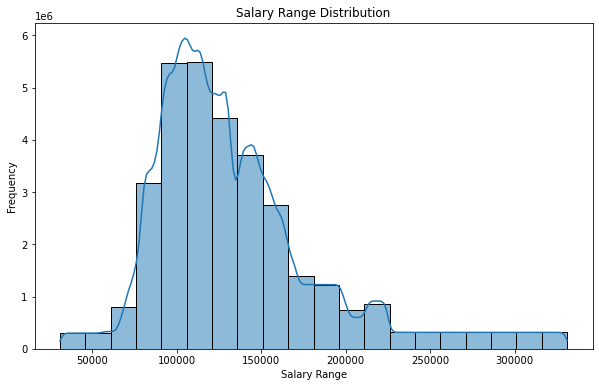

In [31]:
import seaborn as sns
# Create a distribution plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(salary_range, bins=20, kde=True)
plt.xlabel('Salary Range')
plt.ylabel('Frequency')
plt.title('Salary Range Distribution')
plt.show()

## Company name

- ### Problems
    * have unnecessary content (company rating Healthfirst,4.1...)

    
- ### Solutions
    * drop, strip or replace such contents|
    

In [32]:
df.company_name

index
0               Healthfirst\n3.1
1                   ManTech\n4.2
2            Analysis Group\n3.8
3                   INFICON\n3.5
4        Affinity Solutions\n2.9
                 ...            
667                TRANZACT\n3.6
668                         JKGT
669                   AccessHope
670    ChaTeck Incorporated\n5.0
671           1-800-Flowers\n2.7
Name: company_name, Length: 672, dtype: object

In [33]:
df["company_name"]=df.company_name.str.split("\n").str[0]

In [34]:
df.sample(10)

,job_title,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,main_role,seniority,sub_role,salary_range($),min_salary,max_salary,avg_salary
index,,,,,,,,,,,,,,,,,,,,
111,Data Analyst,Big Huge Games is looking for a qualified Data...,4.9,Big Huge Games,"Timonium, MD","Lutherville Timonium, MD",51 to 200 employees,2013,Subsidiary or Business Segment,Video Games,Media,Unknown / Non-Applicable,-1,data analyst/analyst,neutral,,99000-132000,99000,132000,115499.5
651,AI Ops Data Scientist,"Company\n\nAstraZeneca is a global, innovation...",4.0,AstraZeneca,"Gaithersburg, MD","Cambridge, United Kingdom",10000+ employees,1913,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Roche, GlaxoSmithKline, Novartis",AI/ machine learning professionle,neutral,Ops Data Scientist,92000-155000,92000,155000,123499.5
8,Staff Data Scientist - Analytics,Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data,"San Diego, CA","Mountain View, CA",5001 to 10000 employees,1983,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),"Square, PayPal, H&R Block",data scientist,jr,Staff - Analytics,137000-171000,137000,171000,153999.5
173,Senior Data Scientist - Algorithms,Company Description: Quartet is a pioneering h...,3.9,Quartet Health,"New York, NY","New York, NY",201 to 500 employees,2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,data scientist,Sr,Senior - Algorithms,101000-165000,101000,165000,132999.5
61,Machine Learning Engineer,The Video & Image Understanding Group develops...,4.5,Systems & Technology Research,"Woburn, MA","Woburn, MA",201 to 500 employees,2010,Company - Private,Aerospace & Defense,Aerospace & Defense,$100 to $500 million (USD),-1,AI/ machine learning professionle,neutral,Engineer,75000-131000,75000,131000,102999.5
296,Data Scientist,"Job Description\nExpertise in NLP, including a...",3.4,SleePare,"New York, NY","New York, NY",1 to 50 employees,2017,Company - Private,Other Retail Stores,Retail,Unknown / Non-Applicable,-1,data scientist,neutral,,141000-225000,141000,225000,182999.5
652,Senior Data Scientist,"About Us\n\nAt GutCheck, we pioneered agile ma...",3.8,GutCheck,"Denver, CO","Denver, CO",51 to 200 employees,2009,Company - Private,Advertising & Marketing,Business Services,$10 to $25 million (USD),"Nielsen, Zappi, SurveyMonkey",data scientist,Sr,Senior,105000-167000,105000,167000,135999.5
529,Data Scientist - Image and Video Analytics,Company Industry: Technology\nOpportunity: The...,4.9,The Mom Project,"Longmont, CO","Chicago, IL",1 to 50 employees,2016,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,data scientist,neutral,- Image and Video Analytics,66000-112000,66000,112000,88999.5
611,(Sr.) Data Scientist -,"Thursday, June 11, 2020\n\nMerrick Bank is a t...",3.6,Merrick Bank,Utah,"South Jordan, UT",201 to 500 employees,1997,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,data scientist,Sr,(Sr.) -,87000-141000,87000,141000,113999.5


## location & headquarters



In [39]:
df["headquarters"].unique()

array(['New York, NY', 'Herndon, VA', 'Boston, MA',
       'Bad Ragaz, Switzerland', 'Santa Barbara, CA',
       'Basel, Switzerland', 'Bedford, MA', 'Mountain View, CA',
       'Chicago, IL', 'Mc Lean, VA', 'Saint Louis, MO', 'Richland, WA',
       'Northbrook, IL', 'Princeton, NJ', 'Mays Landing, NJ',
       'Washington, DC', 'Memphis, TN', 'Tempe, AZ', 'Reading, PA',
       'San Francisco, CA', 'Menlo Park, CA', 'Atlanta, GA',
       'Orlando, FL', 'Lexington, MA', 'Falls Church, VA',
       'Sheboygan, WI', 'Seattle, WA', 'Bellevue, WA', 'Lincoln, NE',
       'Chantilly, VA', 'Santa Monica, CA', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Singapore, Singapore',
       'Cambridge, MA', 'OSAKA, Japan', 'Santa Clara, CA', 'Vienna, VA',
       'New Orleans, LA', 'Akron, OH', 'Zurich, Switzerland',
       'Woburn, MA', 'Carson, CA', 'Coral Gables, FL', 'San Ramon, CA',
       'Brisbane, CA', 'Winter Park, FL', 'San Rafael, CA',
       'Deerfield, IL', 'Ipswich, MA',

In [41]:
df["location"].unique()

array(['New York, NY', 'Chantilly, VA', 'Boston, MA', 'Newton, MA',
       'Santa Barbara, CA', 'Cambridge, MA', 'Bedford, MA',
       'San Diego, CA', 'Chicago, IL', 'Herndon, VA', 'Saint Louis, MO',
       'Richland, WA', 'Northbrook, IL', 'Washington, DC', 'Remote',
       'Memphis, TN', 'Plano, TX', 'West Grove, PA', 'Phoenix, AZ',
       'Appleton, WI', 'Atlanta, GA', 'Orlando, FL', 'Lexington, MA',
       'McLean, VA', 'San Francisco, CA', 'Sheboygan, WI',
       'United States', 'Bothell, WA', 'Lincoln, NE', 'Overland Park, KS',
       'Santa Monica, CA', 'Portsmouth, NH', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Bellevue, WA',
       'New Orleans, LA', 'Akron, OH', 'Fort Wayne, IN', 'Woburn, MA',
       'Carson, CA', 'Coral Gables, FL', 'Santa Clara, CA',
       'Brisbane, CA', 'Winter Park, FL', 'Redwood City, CA',
       'Peoria, IL', 'Ipswich, MA', 'Carmel, IN', 'Emeryville, CA',
       'Gaithersburg, MD', 'Longmont, CO', 'Austin, TX', 'Yakima, WA',
 

In [50]:
df.loc[df["headquarters"]=='-1']

,job_title,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,...,seniority,sub_role,salary_range($),min_salary,max_salary,avg_salary,company_city,company_state,headquarter_city,headquarter_state
index,,,,,,,,,,,,,,,,,,,,,
154,ELISA RESEARCH SCIENTIST (CV-15),"Covaxx, a subsidiary of the UBI Group, has joi...",-1.0,Covid-19 Search Partners,"Hauppauge, NY",-1,-1,-1,-1,-1,...,neutral,ELISA RESEARCH SCIENTIST (CV-15),90000-109000,90000,109000,99499.5,Hauppauge,NY,-1,NaN
158,Machine Learning Engineer,Overview\n\nRadical Convergence is a fast-pace...,-1.0,Radical Convergence,"Reston, VA",-1,-1,-1,-1,-1,...,neutral,Engineer,101000-165000,101000,165000,132999.5,Reston,VA,-1,NaN
258,Data Scientist,Full Time Data Scientist\n\nThe Drive Media is...,5.0,"The Drive Media, Inc.","New York, NY",-1,Unknown,-1,Unknown,-1,...,neutral,,90000-124000,90000,124000,106999.5,New York,NY,-1,NaN
351,Data Scientist,About Our AI/ML Team\n\nOur mission is to buil...,-1.0,Point72 Ventures,"Palo Alto, CA",-1,-1,-1,-1,-1,...,neutral,,122000-146000,122000,146000,133999.5,Palo Alto,CA,-1,NaN
357,Data Scientist,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,...,neutral,,122000-146000,122000,146000,133999.5,San Francisco,CA,-1,NaN
358,Data Scientist,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,...,neutral,,122000-146000,122000,146000,133999.5,San Francisco,CA,-1,NaN
359,Data Scientist,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,...,neutral,,122000-146000,122000,146000,133999.5,San Francisco,CA,-1,NaN
360,Data Scientist,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,...,neutral,,122000-146000,122000,146000,133999.5,San Francisco,CA,-1,NaN
361,Data Scientist,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,...,neutral,,122000-146000,122000,146000,133999.5,San Francisco,CA,-1,NaN


- ### Problems
    * location column show (company city, company state) which can be shown in separate columns
    * headquarters column show (headquarter city, headQuarter state) which can be shown in separate columns
    * faulty data in headquarters (-1)
    
- ### Solutions
    * create separate columns to show city and stata
    * -1 in headquarters column might mean unknown or no headquarter
    

In [52]:
#changing -1 into no headquarter
df["headquarters"].replace('-1','no_headquarter,no_headquarter',inplace=True)

In [54]:
def createCityState(location:pd.Series):

    
    city=location.str.split(",").str[0]
    state=location.str.split(",").str[1]
    
    return city,state

In [55]:
df=df.assign(company_city=createCityState(df["location"])[0],  company_state=createCityState(df["location"])[1])
df=df.assign(headquarter_city=createCityState(df["headquarters"])[0],  headquarter_state=createCityState(df["headquarters"])[1])


In [56]:
df.sample(10)

,job_title,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,...,seniority,sub_role,salary_range($),min_salary,max_salary,avg_salary,company_city,company_state,headquarter_city,headquarter_state
index,,,,,,,,,,,,,,,,,,,,,
460,Data Scientist,As a data scientist at TBWA\Chiat\Day New York...,2.7,TBWA\Chiat\Day,"New York, NY","New York, NY",1001 to 5000 employees,1968,Company - Public,Advertising & Marketing,...,neutral,,69000-116000,69000,116000,92499.5,New York,NY,New York,NY
133,Data Scientist,It's fun to work in a company where people tru...,3.3,NAVEX Global,"Lake Oswego, OR","Lake Oswego, OR",1001 to 5000 employees,2012,Company - Private,Computer Hardware & Software,...,neutral,,90000-109000,90000,109000,99499.5,Lake Oswego,OR,Lake Oswego,OR
14,Data Scientist,Position Description:\n\nWant to make a differ...,3.4,Mathematica Policy Research,"Washington, DC","Princeton, NJ",1001 to 5000 employees,1986,Company - Private,Consulting,...,neutral,,137000-171000,137000,171000,153999.5,Washington,DC,Princeton,NJ
487,"Data Scientist, Applied Machine Learning - Bay...",Passionate about precision medicine and advanc...,3.3,Tempus Labs,"Redwood City, CA","Chicago, IL",501 to 1000 employees,2015,Company - Private,Biotech & Pharmaceuticals,...,neutral,"Data Scientist, Applied - Bay Area",95000-119000,95000,119000,106999.5,Redwood City,CA,Chicago,IL
44,Data Scientist,The Opportunity\n\nEversight is the recognized...,4.2,Eversight,"Palo Alto, CA","Palo Alto, CA",51 to 200 employees,2013,Company - Private,Enterprise Software & Network Solutions,...,neutral,,75000-131000,75000,131000,102999.5,Palo Alto,CA,Palo Alto,CA
165,Data Scientist,Job Description\nWe are looking to expand our ...,4.4,Offerpad,"Chandler, AZ","Chandler, AZ",201 to 500 employees,2015,Company - Private,Real Estate,...,neutral,,101000-165000,101000,165000,132999.5,Chandler,AZ,Chandler,AZ
404,Senior Scientist - Toxicologist - Product Inte...,British American Tobacco\nReynolds American In...,3.3,Reynolds American,"Winston-Salem, NC","Winston-Salem, NC",5001 to 10000 employees,1875,Company - Private,Consumer Products Manufacturing,...,Sr,Senior Scientist - Toxicologist - Product Inte...,110000-163000,110000,163000,136499.5,Winston-Salem,NC,Winston-Salem,NC
629,Data Scientist,Job Description\nData Scientist\nDuration: 6+ ...,4.7,CRS Group,"Chicago, IL","Itasca, IL",51 to 200 employees,1994,Company - Private,Staffing & Outsourcing,...,neutral,,87000-141000,87000,141000,113999.5,Chicago,IL,Itasca,IL
540,Data Scientist,Please reach me at 916-605-4621shivang.rajpala...,3.8,AgreeYa Solutions,"Thousand Oaks, CA","Folsom, CA",1001 to 5000 employees,1999,Company - Private,IT Services,...,neutral,,66000-112000,66000,112000,88999.5,Thousand Oaks,CA,Folsom,CA


## size,founded,revenue


In [74]:
df["size"].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', 'Unknown'],
      dtype=object)

In [75]:
df.loc[(df["size"]=='-1')]

,job_title,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,...,sub_role,salary_range($),min_salary,max_salary,avg_salary,company_city,company_state,headquarter_city,headquarter_state,company_size_category
index,,,,,,,,,,,,,,,,,,,,,


In [76]:
df["founded"].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962], dtype=int64)

In [77]:
df.loc[df["founded"]==-1]

,job_title,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,...,sub_role,salary_range($),min_salary,max_salary,avg_salary,company_city,company_state,headquarter_city,headquarter_state,company_size_category
index,,,,,,,,,,,,,,,,,,,,,
69,Data Scientist - Machine Learning,"Headquartered in Brisbane, Calif., CareDx, Inc...",2.5,CareDx,"Brisbane, CA","Brisbane, CA",1 to 50 employees,-1,Company - Private,Biotech & Pharmaceuticals,...,Data Scientist -,79000-131000,79000,131000,104999.5,Brisbane,CA,Brisbane,CA,Small
112,Data Scientist (TS/SCI),Are you an intelligence analyst looking to fur...,3.5,Maxar Technologies,"Herndon, VA","Westminster, CO",5001 to 10000 employees,-1,Company - Public,Aerospace & Defense,...,(TS/SCI),99000-132000,99000,132000,115499.5,Herndon,VA,Westminster,CO,Large
154,ELISA RESEARCH SCIENTIST (CV-15),"Covaxx, a subsidiary of the UBI Group, has joi...",-1.0,Covid-19 Search Partners,"Hauppauge, NY",no_headquarter,Unknown,-1,-1,-1,...,ELISA RESEARCH SCIENTIST (CV-15),90000-109000,90000,109000,99499.5,Hauppauge,NY,no_headquarter,NaN,Unknown
158,Machine Learning Engineer,Overview\n\nRadical Convergence is a fast-pace...,-1.0,Radical Convergence,"Reston, VA",no_headquarter,Unknown,-1,-1,-1,...,Engineer,101000-165000,101000,165000,132999.5,Reston,VA,no_headquarter,NaN,Unknown
162,Geospatial Data Scientist,Maxar is seeking a seasoned Geospatial Data Sp...,3.5,Maxar Technologies,"Chantilly, VA","Westminster, CO",5001 to 10000 employees,-1,Company - Public,Aerospace & Defense,...,Geospatial,101000-165000,101000,165000,132999.5,Chantilly,VA,Westminster,CO,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Data Scientist,Solution IT Inc. is looking for an Data Scient...,4.4,"SolutionIT, Inc.","Edison, NJ","Wilmington, MA",51 to 200 employees,-1,Company - Private,-1,...,,105000-167000,105000,167000,135999.5,Edison,NJ,Wilmington,MA,Small
664,Data Scientist,Job Description\nClear Ridge has an exciting o...,-1.0,Clear Ridge Defense,"Quantico, VA","Baltimore, MD",1 to 50 employees,-1,Company - Private,-1,...,,105000-167000,105000,167000,135999.5,Quantico,VA,Baltimore,MD,Small
668,Data Scientist,Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",no_headquarter,Unknown,-1,-1,-1,...,,105000-167000,105000,167000,135999.5,San Francisco,CA,no_headquarter,NaN,Unknown


In [92]:
df["revenue"].unique()

array(['Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)', '$10+ billion (USD)',
       '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
       '$5 to $10 billion (USD)', '$10 to $25 million (USD)',
       '$25 to $50 million (USD)', '$50 to $100 million (USD)',
       '$1 to $5 million (USD)', '$5 to $10 million (USD)',
       'Less than $1 million (USD)', '-1'], dtype=object)


- ### Problems
    * faulty data in column (-1)
    
- ### Solutions
    * can create a new column for better experience
    * -1 in column can be changed into Unknown
    

In [93]:
## replacing -1 into Unknown
df["size"].replace("-1","Unknown",inplace=True)
df["founded"].replace(-1,np.NaN,inplace=True)
df["revenue"].replace("-1",'Unknown / Non-Applicable',inplace=True)

In [64]:
df["size"].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', 'Unknown'],
      dtype=object)

In [65]:
# Define a mapping dictionary for company size categories
size_mapping = {
    '1 to 50 employees': 'Small',
    '51 to 200 employees': 'Small',
    '201 to 500 employees': 'Medium',
    '501 to 1000 employees': 'Medium',
    '1001 to 5000 employees': 'Large',
    '5001 to 10000 employees': 'Large',
    '10000+ employees': 'Very Large',
    'Unknown': 'Unknown'
}

In [70]:
# Create a new column 'Company Size Category' based on the mapping
df['company_size_category'] = df['size'].map(size_mapping)

In [79]:
df["founded"].unique()

array([1993., 1968., 1981., 2000., 1998., 2010., 1996., 1990., 1983.,
       2014., 2012., 2016., 1965., 1973., 1986., 1997., 2015., 1945.,
       1988., 2017., 2011., 1967., 1860., 1992., 2003., 1951., 2005.,
       2019., 1925., 2008., 1999., 1978., 1966., 1912., 1958., 2013.,
       1849., 1781., 1926., 2006., 1994., 1863., 1995.,   nan, 1982.,
       1974., 2001., 1985., 1913., 1971., 1911., 2009., 1959., 2007.,
       1939., 2002., 1961., 1963., 1969., 1946., 1957., 1953., 1948.,
       1850., 1851., 2004., 1976., 1918., 1954., 1947., 1955., 2018.,
       1937., 1917., 1935., 1929., 1820., 1952., 1932., 1894., 1960.,
       1788., 1830., 1984., 1933., 1880., 1887., 1970., 1942., 1980.,
       1989., 1908., 1853., 1875., 1914., 1898., 1956., 1977., 1987.,
       1896., 1972., 1949., 1962.])

In [80]:
# Define bins for the categories and labels for each category
bins = [1700, 1800, 1900, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['1700s-1800s', '1800s-1900s', '1900s-1950s', '1950s-1960s', '1960s-1970s',
          '1970s-1980s', '1980s-1990s', '1990s-2000s', '2000s-2010s', '2010s-2020s']

In [82]:
# Create a new column 'Founded Year Category' based on the bins
df['founded_year_category'] = pd.cut(df['founded'], bins=bins, labels=labels)

In [83]:
df.sample(5)

,job_title,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,...,salary_range($),min_salary,max_salary,avg_salary,company_city,company_state,headquarter_city,headquarter_state,company_size_category,founded_year_category
index,,,,,,,,,,,,,,,,,,,,,
91,Machine Learning Engineer,"Machine Learning Engineer Springfield, VA\n\nM...",4.4,NuWave Solutions,"Springfield, VA","Mc Lean, VA",51 to 200 employees,1999.0,Company - Private,IT Services,...,79000-131000,79000,131000,104999.5,Springfield,VA,Mc Lean,VA,Small,1990s-2000s
606,Data Scientist,"Meridian Knowledge Solutions, LLC, is the lead...",4.4,Meridian Knowledge Solutions,"Washington, DC","Reston, VA",51 to 200 employees,1997.0,Subsidiary or Business Segment,Enterprise Software & Network Solutions,...,80000-132000,80000,132000,105999.5,Washington,DC,Reston,VA,Small,1990s-2000s
127,Data Scientist,Ready to write the best chapter of your career...,3.6,XSELL Technologies,"Chicago, IL","Chicago, IL",51 to 200 employees,2014.0,Company - Private,Enterprise Software & Network Solutions,...,90000-109000,90000,109000,99499.5,Chicago,IL,Chicago,IL,Small,2010s-2020s
41,Machine Learning Engineer,We deliver our customers peace of mind every d...,3.4,Liberty Mutual Insurance,"Portsmouth, NH","Boston, MA",10000+ employees,1912.0,Company - Private,Insurance Carriers,...,75000-131000,75000,131000,102999.5,Portsmouth,NH,Boston,MA,Very Large,1900s-1950s
274,Data Scientist,Job Description\nClient JD below:\n\nWe need a...,5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,NaN,Company - Public,-1,...,91000-150000,91000,150000,120499.5,San Francisco,CA,Jersey City,NJ,Unknown,NaN


In [95]:
# Define a mapping dictionary for revenue categories
revenue_mapping = {
    'Unknown / Non-Applicable': 'Unknown',
    'Less than $1 million (USD)': 'Less than $1M',
    '$1 to $5 million (USD)': '$1M to $5M',
    '$5 to $10 million (USD)': '$5M to $10M',
    '$10 to $25 million (USD)': '$10M to $25M',
    '$25 to $50 million (USD)': '$25M to $50M',
    '$50 to $100 million (USD)': '$50M to $100M',
    '$100 to $500 million (USD)': '$100M to $500M',
    '$500 million to $1 billion (USD)': '$500M to $1B',
    '$1 to $2 billion (USD)': '$1B to $2B',
    '$2 to $5 billion (USD)': '$2B to $5B',
    '$5 to $10 billion (USD)': '$5B to $10B',
    '$10+ billion (USD)': '$10B+'
}

In [97]:

# Create a new column 'Revenue Category' based on the mapping
df['revenue'] = df['revenue'].map(revenue_mapping)

## Type of Ownership, Industry, Sector

In [87]:
df["type_of_ownership"].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', '-1',
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

In [88]:
df["industry"].unique()

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', '-1', 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil 

In [90]:
df["sector"].unique()

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Health Care',
       'Finance', 'Aerospace & Defense', '-1',
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)


- ### Problems
    * faulty data in column (-1)
    
- ### Solutions
    * -1 in column can be changed into Unknown

In [91]:
df["type_of_ownership"].replace("-1","Unknown",inplace=True)
df["sector"].replace("-1","Unknown",inplace=True)
df["industry"].replace("-1","Unknown",inplace=True)

## Dropping  unnecessary columns

In [99]:
df.columns

Index(['job_title', 'job_description', 'rating', 'company_name', 'location',
       'headquarters', 'size', 'founded', 'type_of_ownership', 'industry',
       'sector', 'revenue', 'competitors', 'main_role', 'seniority',
       'sub_role', 'salary_range($)', 'min_salary', 'max_salary', 'avg_salary',
       'company_city', 'company_state', 'headquarter_city',
       'headquarter_state', 'company_size_category', 'founded_year_category'],
      dtype='object')

* job_description and competitors are no use in further data analysis
* location, headquarters, size, and founded columns are transformed into new categories so they can also be droppede

In [103]:
columns_to_drop =['job_description','location',
       'headquarters', 'size', 'founded','competitors']
df.drop(columns=columns_to_drop,axis=1,inplace=True)

In [104]:
df.sample()

,job_title,rating,company_name,type_of_ownership,industry,sector,revenue,main_role,seniority,sub_role,salary_range($),min_salary,max_salary,avg_salary,company_city,company_state,headquarter_city,headquarter_state,company_size_category,founded_year_category
index,,,,,,,,,,,,,,,,,,,,
77,Data Scientist,3.5,The Knot Worldwide,Company - Private,Internet,Information Technology,Unknown,data scientist,neutral,,79000-131000,79000,131000,104999.5,Washington,DC,Chevy Chase,MD,Large,2010s-2020s


In [105]:
df.to_csv("Cleaned_DS_jobs.csv",index=False)